### Quiz 1: 
#### Name: Ruixin Huang
#### Number: 2802466713

In [11]:
# import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error


In [12]:
 # Q1 import your data from the given link directly
df = pd.read_csv("https://bit.ly/datasetA")
df.head()

,Unnamed: 0,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [13]:
# Q2 column that has the most missing values
missing_percent = df.isnull().mean() * 100
print(missing_percent)

Unnamed: 0            0.000000
Name                  0.000000
Age                   0.000000
Gender                0.000000
Blood Type            0.000000
Medical Condition     0.000000
Date of Admission     0.000000
Doctor                3.960360
Hospital              0.000000
Insurance Provider    3.951351
Billing Amount        0.000000
Room Number           0.000000
Admission Type        0.000000
Discharge Date        0.000000
Medication            9.760360
Test Results          0.000000
dtype: float64


In [14]:
#Q3: How many rows in the dataset that has at least one missing value in their columns
df.isnull().sum()
#missing_rows = 0
#for i in missing_percent != 0.000000:
  #   missing_rows +=1
  #   print(missing_rows)
    

Unnamed: 0               0
Name                     0
Age                      0
Gender                   0
Blood Type               0
Medical Condition        0
Date of Admission        0
Doctor                2198
Hospital                 0
Insurance Provider    2193
Billing Amount           0
Room Number              0
Admission Type           0
Discharge Date           0
Medication            5417
Test Results             0
dtype: int64

In [20]:
# Q4: average age of Male
# Q5: # Which gender has the higher age average?
df.groupby('Gender', as_index=False).Age.mean()

,Gender,Age
0,Female,51.578735
1,Male,51.500252


In [27]:
# Q6 # How many patients take Ibuprofen as the medication? (in the original data)
Ibuprofen_patient = df[df["Medication"] == 'Ibuprofen']
print(Ibuprofen_patient)
print('Number of patients take Ibuprofen as the medication :' ,Ibuprofen_patient['Name'].count())

       Unnamed: 0            Name  Age  Gender Blood Type Medical Condition  \
1               1    LesLie TErRy   62    Male         A+           Obesity   
3               3    andrEw waTtS   28  Female         O+          Diabetes   
5               5   EMILY JOHNSOn   36    Male         A+            Asthma   
26             26     cathy sMaLl   51  Female         O-            Asthma   
33             33     Erin oRTEga   43    Male        AB-            Cancer   
...           ...             ...  ...     ...        ...               ...   
55487       55487  mIsTy RICharDs   78  Female         O-      Hypertension   
55494       55494   JEssIcA WHiTe   67    Male         O+         Arthritis   
55497       55497    HEATher WaNG   38  Female         B+      Hypertension   
55498       55498  JENniFER JOneS   43    Male         O-         Arthritis   
55499       55499    jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission           Doctor           

In [29]:
# Q7: Filling value with most frequent data from each respective column
print("\nReplace the missing values with the most frequent values present in each column:")
result = df.fillna(df.mode().iloc[0])
print(result)


Replace the missing values with the most frequent values present in each column:
       Unnamed: 0               Name  Age  Gender Blood Type  \
0               0      Bobby JacksOn   30    Male         B-   
1               1       LesLie TErRy   62    Male         A+   
2               2        DaNnY sMitH   76  Female         A-   
3               3       andrEw waTtS   28  Female         O+   
4               4      adrIENNE bEll   43  Female        AB+   
...           ...                ...  ...     ...        ...   
55495       55495  eLIZABeTH jaCkSOn   42  Female         O+   
55496       55496         KYle pEREz   61  Female        AB-   
55497       55497       HEATher WaNG   38  Female         B+   
55498       55498     JENniFER JOneS   43    Male         O-   
55499       55499       jAMES GARCiA   53  Female         O+   

      Medical Condition Date of Admission            Doctor  \
0                Cancer        2024-01-31     Matthew Smith   
1               Obesity

In [30]:
# what is the most medication used
print('Most medication used', result['Medication'].value_counts())

Most medication used Medication
Ibuprofen      15477
Lipitor        10047
Penicillin     10032
Aspirin         9989
Paracetamol     9955
Name: count, dtype: int64


In [34]:
# Which hospital has the most patients admitted
most_popular_hospital = result.groupby('Hospital').size().sort_values(ascending=False)
print(most_popular_hospital)

Hospital
LLC Smith                      44
Ltd Smith                      39
Johnson PLC                    38
Smith Ltd                      37
Smith PLC                      36
                               ..
Jimenez Wade, and King          1
Jimenez Roy, Johnson and        1
Jimenez Logan Lee, and          1
Jimenez Humphrey and Evans,     1
and Zuniga Thompson, Blake      1
Length: 39876, dtype: int64


In [38]:
most_common_mediction = df.groupby('Medical Condition').size().sort_values(ascending=False)
print(most_common_mediction)

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
dtype: int64


<Figure size 800x600 with 0 Axes>

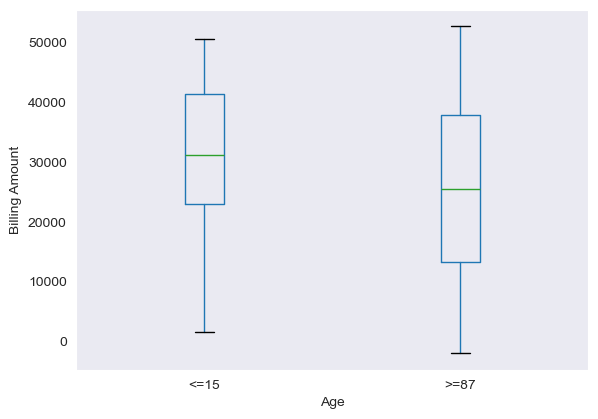

In [56]:
# Prepare data for boxplot
df['Age Group'] = pd.cut(df['Age'], bins=[0, 15, 100], labels=['<=15', '>=87'])

plt.figure(figsize=(8, 6))
df.boxplot(column='Billing Amount', by='Age Group', grid=False)

plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.title('')
plt.suptitle('')  # Remove the automatic title
plt.show()

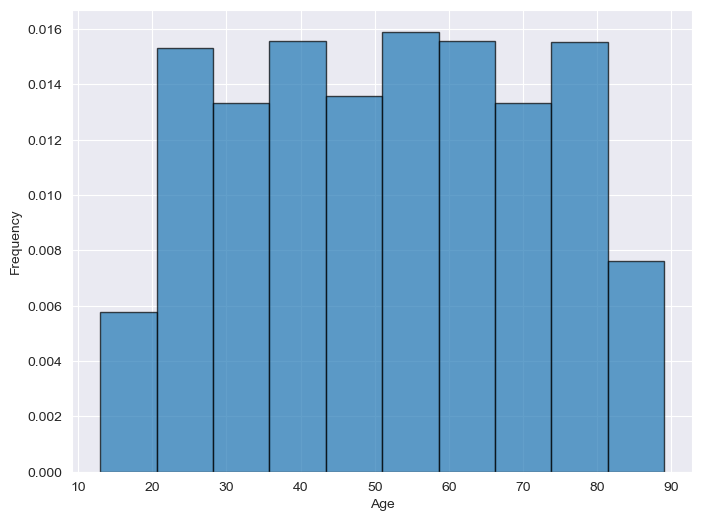

In [57]:
plt.figure(figsize=(8, 6))

# Plot histogram with density
df['Age'].plot(kind='hist', bins=10, density=True, alpha=0.7, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [45]:
# Convert the Date of Admission into Pandas datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df.head()

,Unnamed: 0,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [47]:
df["Month"] = df["Date of Admission"].dt.month
df.head()

,Unnamed: 0,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Month
0,0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,1
1,1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,8
2,2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,9
3,3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,11
4,4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,9


In [58]:
# Filter for patients age >= 87
df_filtered = df[df['Age'] >= 87]

# Scatter plot grouped by gender
colors = {'Female': 'tab:blue', 'Male': 'tab:orange'}
plt.figure(figsize=(8, 6))
for gender, group in df_filtered.groupby('Gender'):
    plt.scatter(group['Month'], group['Billing Amount'], 
                label=gender, alpha=0.7, s=100, c=colors[gender])

plt.xlabel('Month')
plt.ylabel('Billing Amount')
plt.title('Patients Age >=87')
plt.legend(title='Gender')
plt.show()


KeyError: 'Month'

<Figure size 800x600 with 0 Axes>